In [11]:
steps=0


def max_heapify(A, i, heap_size):
    global steps
    l = 2 * i + 1  # left
    r = 2 * i + 2  # right
    largest = i
    
    steps+=3
    
    if l < heap_size and A[l] > A[largest]:
        largest = l
        steps+=1

    if r < heap_size and A[r] > A[largest]:
        largest = r
        steps+=1

    if largest != i:
        A[largest], A[i] = A[i], A[largest]
        steps+=1

        max_heapify(A, largest, heap_size)
        # steps=max_heapify(A, largest, heap_size)

def heap_sort(A):
    global steps
    steps=0
    
    heap_size = len(A)
    steps+=1
    
    #builds max heap
    for i in range(heap_size // 2 - 1, -1, -1):
        max_heapify(A, i, heap_size)
        # steps=max_heapify(A, i, heap_size)
        steps+=1
    

    for i in range(len(A) - 1, 0, -1):
        # exchange A[0] with A[i]
        A[0], A[i] = A[i], A[0]

        heap_size -= 1
        steps+=2

        max_heapify(A, 0, heap_size)
        # steps=max_heapify(A, 0, heap_size)

    return steps


In [12]:
a=[1, 2, 5, 6, 3, 10]
heap_sort(a)
print(a)

[1, 2, 3, 5, 6, 10]


In [13]:
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

N=[]
step_list=[]
ref=[]
c=[]
points=14
A=[1,6,3,2,8,0]


for i in range(points):
    steps=heap_sort(A)
    N.append(len(A))
    step_list.append(steps)
    c.append(steps/(len(A)*math.log(len(A)))) #estimate c in T(sort)=c*N*log(N)
    
    A*=2






In [14]:
ref=[]
for value in N:
    ref.append([value*math.log(value) *c[6]])
    # ref.append(math.floor(value*math.log(value)*c[6]))
    
print(c[6])
    

5.693537804350223


[6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288, 24576, 49152] [75, 202, 488, 1184, 2627, 5861, 13010, 29084, 64210, 140596, 305092, 660224, 1419646, 3033830]
[6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288, 24576, 49152] [[61.20870164611453], [169.77491941019088], [434.2648710563054], [1057.9598065844582], [2494.7797421126106], [5747.279742112611], [13010.0], [29050.881031549558], [64163.52412619823], [140450.57237859466], [305148.19300958584], [658790.4825239646], [1414569.158057515], [3023114.7021342013]]


Text(0.5, 1.0, 'Asymptotic running time')

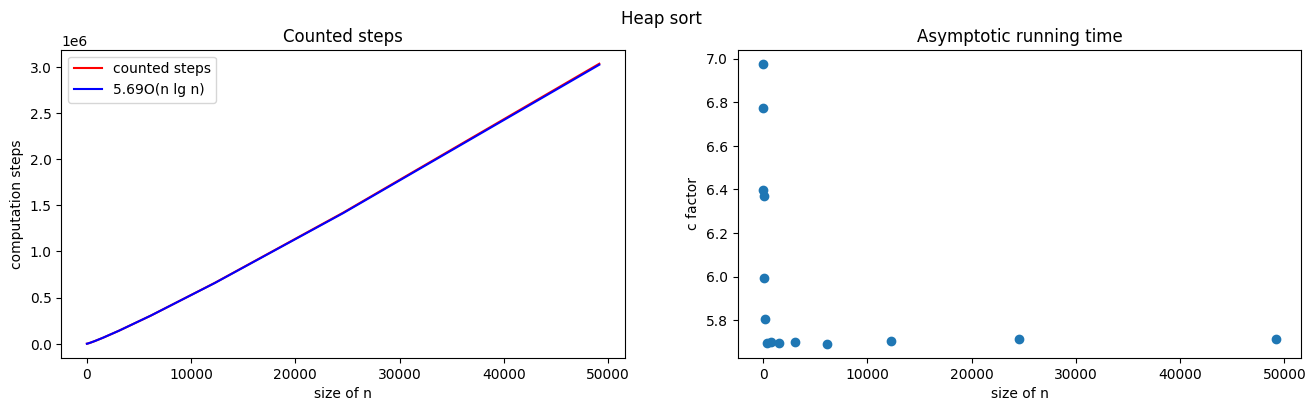

In [15]:
print(N,step_list)
print(N,ref)
mpl.rcParams['figure.figsize'] = [16,4]
fig, ax = plt.subplots(1, 2)
fig.suptitle('Heap sort')

ax[0].plot(N,step_list, color="red", label="counted steps")
ax[0].plot(N, ref, color="blue", label=f"{round(c[6],2)}O(n lg n)")

ax[0].set_xlabel("size of n")
ax[0].set_ylabel("computation steps")
ax[0].legend()
ax[0].set_title("Counted steps")

ax[1].scatter(N,c, label="approximation of c")
ax[1].set_xlabel("size of n")
ax[1].set_ylabel("c factor")
ax[1].set_title("Asymptotic running time")
